In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#1

df_survey_data = pd.read_excel('https://foxweb.marist.edu/users/jf4n/DATA_FILES/SurveyData.xlsx', sheet_name='Data')
print(df_survey_data.head)

# Summary of statistics
print(df_survey_data.describe)


<bound method NDFrame.head of      Attitude   In Shape   Fashionable   Stylish   Individualistic  \
0           6          5             5         4                 6   
1           9          6             6         4                 4   
2           8          9             8         7                 7   
3           3          2             2         3                 3   
4           5          5             5         4                 6   
..        ...        ...           ...       ...               ...   
395         5          4             5         5                 4   
396         6          4             4         4                 3   
397         1          3             4         2                 5   
398         5          6             6         8                 5   
399         8          6             6         6                 7   

      Risk Taker   No Ozone Concern   Right To Pollute   Society Fine  \
0              5                  4                  5  

In [ ]:
# displaying basic stats
basic_statistics = df_survey_data.describe()
print(basic_statistics)


         Attitude    In Shape   Fashionable     Stylish   Individualistic  \
count  400.000000  400.000000    400.000000  400.000000        400.000000   
mean     5.022500    4.305000      4.340000    4.602500          4.802500   
std      2.587224    1.525711      1.505013    1.601845          1.306814   
min      1.000000    1.000000      1.000000    1.000000          1.000000   
25%      3.000000    3.000000      3.000000    3.000000          4.000000   
50%      5.000000    4.000000      4.000000    5.000000          5.000000   
75%      7.000000    5.000000      5.000000    6.000000          6.000000   
max      9.000000    9.000000      9.000000    9.000000          9.000000   

        Risk Taker   No Ozone Concern   Right To Pollute   Society Fine  \
count   400.000000         400.000000         400.000000     400.000000   
mean      4.697500           5.055000           5.260000       4.955000   
std       1.603878           1.618185           1.494317       1.472547   
min   

In [ ]:
# dropping attitude column
df_survey_data_no_attitude = df_survey_data.drop(columns=['Attitude'])

# Stacking the modified DataFrame
stacked_df = df_survey_data_no_attitude.stack()

print(stacked_df)



0     In Shape           5
      Fashionable        5
      Stylish            4
      Individualistic    6
      Risk Taker         5
                        ..
399   Early Adopter      5
      Active             5
      Skeptics Wrong     9
      Determined         9
      Optimistic         9
Length: 12000, dtype: int64


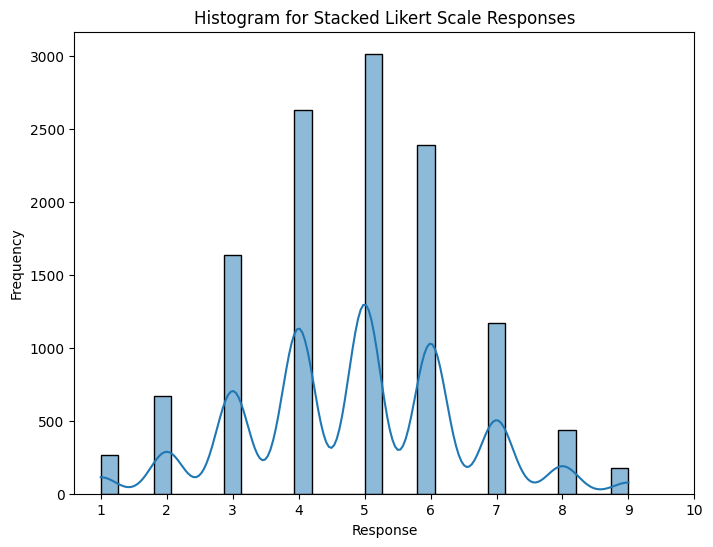

In [ ]:
#histogram of likert scale responses
stacked_data = df_survey_data.stack()
plt.figure(figsize=(8, 6))
sns.histplot(stacked_data, bins=30,kde=True)
plt.title('Histogram for Stacked Likert Scale Responses')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.show()


In [ ]:
#2 checking missing values
missing_values = df_survey_data.isnull().sum()
missing_values


Attitude                   0
 In Shape                  0
 Fashionable               0
 Stylish                   0
 Individualistic           0
 Risk Taker                0
 No Ozone Concern          0
 Right To Pollute          0
 Society Fine              0
 No Time For Charity       0
 No Debt                   0
 Prefer Cash               0
 Spendthrift               0
 Prefer Credit             0
 No Coupons                0
 Low Interest Buyer        0
 Confident                 0
 Leader                    0
 Dependable                0
 Children Important        0
 Introverted               0
 American Cars Rule        0
 Restrict Japan Imports    0
 Buy American              0
 Adventurous               0
 Midlife Crisis            0
 Early Adopter             0
 Active                    0
 Skeptics Wrong            0
 Determined                0
 Optimistic                0
dtype: int64

In [ ]:
#3 correlation of matrix
correlation_with_attitude = df_survey_data.corr()['Attitude'].sort_values(ascending=False)

print(correlation_with_attitude)


Attitude                   1.000000
 Risk Taker                0.583276
 Adventurous               0.544474
 Midlife Crisis            0.514312
 Skeptics Wrong            0.381288
 Determined                0.377772
 Fashionable               0.335949
 In Shape                  0.329687
 Optimistic                0.313280
 Early Adopter             0.282516
 Stylish                   0.259785
 Individualistic           0.218511
 No Ozone Concern          0.209826
 Restrict Japan Imports    0.203529
 American Cars Rule        0.183948
 Right To Pollute          0.180645
 Buy American              0.165889
 Confident                 0.148759
 Leader                    0.115986
 Active                    0.091662
 No Time For Charity       0.081032
 Society Fine              0.079208
 Dependable                0.070787
 No Debt                   0.051914
 Prefer Credit             0.048659
 No Coupons                0.046781
 Spendthrift               0.040651
 Introverted               0

In [ ]:
#4 partioning the dataset


# Likert scale questions (columns 1-30)
likert_questions = list(range(1, 31))

# target variable (question 31)
X = df_survey_data.iloc[:, likert_questions]
y = df_survey_data['Attitude']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (280, 30)
X_test shape: (120, 30)
y_train shape: (280,)
y_test shape: (120,)


In [ ]:
#5 building linear regression mpodel

# Defining the Linear Regression model
lr = LinearRegression()

# Apply RFE to select the top 10 features
rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

# Building model on selected features
lr.fit(X_train[selected_features], y_train)

# Evaluating as before
print('Training R-squared:', lr.score(X_train[selected_features], y_train))
y_pred = lr.predict(X_test[selected_features])
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Testing RMSE:', rmse)

print('Regression equation:')
for feature, coef in zip(selected_features, lr.coef_):
    print(f"{feature}: {coef:.4f}")


Training R-squared: 0.5629252972065588
Testing RMSE: 1.6197392627879812
Regression equation:
 In Shape: 0.0781
 Fashionable: 0.2338
 Risk Taker: 0.5856
 Right To Pollute: 0.1120
 Low Interest Buyer: 0.1279
 Confident: 0.0883
 Restrict Japan Imports: 0.1290
 Adventurous: 0.6507
 Active: -0.0672
 Determined: 0.2875


In [ ]:
#6  PCA

# Number of chosen components
n_components = 10

pca = PCA(n_components=n_components)

# Fitting PCA on training data
pca.fit(X_train)

# Transforming training and test data using PCA
X_train_pca = pca.transform(X_train)[:, :n_components]
X_test_pca = pca.transform(X_test)[:, :n_components]

# Printing the variance explained by the chosen components
print(f"PCA variance explained by {n_components} components: {sum(pca.explained_variance_ratio_)}")


PCA variance explained by 10 components: 0.8263582031602004


In [ ]:
pca = PCA()
pca.fit(X_train)

#  PCA variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18269158, 0.1255053 , 0.09761939, 0.09458587, 0.07790888,
       0.06871683, 0.05759988, 0.05304468, 0.03857262, 0.03302594,
       0.02767961, 0.02570817, 0.02085285, 0.01397944, 0.01290483,
       0.01171372, 0.01075792, 0.00941144, 0.00617155, 0.00581734,
       0.00514796, 0.00429431, 0.00319591, 0.0027908 , 0.00264253,
       0.00233406, 0.00217532, 0.00180882, 0.00134245])

In [ ]:

# Building linear regression model on PCA
lm = LinearRegression()
lm.fit(X_train_pca, y_train)

# Evaluating on test data
y_pred = lm.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"PCA_MSE: {mse}")
print(f"PCA_R-squared: {r2}")


PCA_MSE: 3.017954834302384
PCA_R-squared: 0.5604208851153674


In [ ]:
#7 Random Forest

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

# Prediction on test data
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"random_forest_mse: {mse_rf}")
print(f"random_forest_r2_Score: {r2_rf}")

random_forest_mse: 2.8997366666666666
random_forest_r2_Score: 0.5776399093704483


In [ ]:
#8
# Defining the threshold for Attitude
threshold = 7

# Creating a new column 'Buyer' based on the threshold (attitude )rule
df_survey_data['Buyer'] = df_survey_data['Attitude'] > threshold

print(df_survey_data)


     Attitude   In Shape   Fashionable   Stylish   Individualistic  \
0           6          5             5         4                 6   
1           9          6             6         4                 4   
2           8          9             8         7                 7   
3           3          2             2         3                 3   
4           5          5             5         4                 6   
..        ...        ...           ...       ...               ...   
395         5          4             5         5                 4   
396         6          4             4         4                 3   
397         1          3             4         2                 5   
398         5          6             6         8                 5   
399         8          6             6         6                 7   

      Risk Taker   No Ozone Concern   Right To Pollute   Society Fine  \
0              5                  4                  5              6   
1            

False    308
True      92
Name: Buyer, dtype: int64


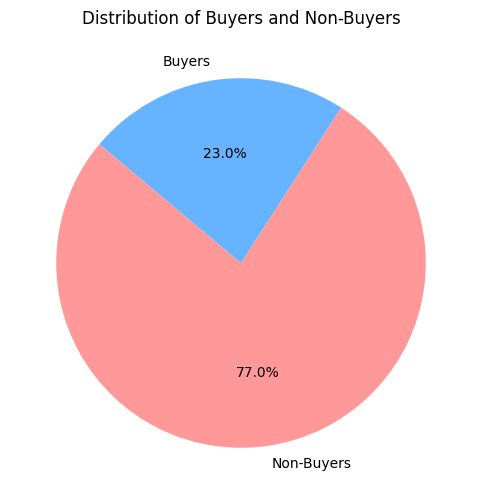

Training set size: 280
Test set size: 120


In [ ]:
#9

# Checking the distribution of Buyers/non-Buyers
buyer_distribution = df_survey_data['Buyer'].value_counts()

print(buyer_distribution)

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(buyer_distribution, labels=['Non-Buyers', 'Buyers'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Buyers and Non-Buyers')
plt.show()

# Splitting data into train/test
train_df, test_df = train_test_split(df_survey_data, test_size=0.3, random_state=42)

print("Training set size:", len(train_df))
print("Test set size:", len(test_df))


In [ ]:
#10

likert_questions = list(range(1, 31))

# Selecting features and target variable (buyer)
X = df_survey_data.iloc[:, likert_questions]
y = df_survey_data['Buyer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating Naive Bayes model
nb = BernoulliNB()

nb.fit(X_train, y_train)

# Making predictions on test set
y_pred = nb.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes accuracy: ", accuracy)

# Generating probabilities from the classifier
y_probs = nb.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC: ", roc_auc)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Precision and Recall
if y_pred.sum() > 0:
    precision = precision_score(y_test, y_pred)
else:
    precision = 0
    print("No positive predictions Detected")

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)


Naive Bayes accuracy:  0.775
ROC AUC:  0.5
F1 Score:  0.0
No positive predictions Detected
Recall:  0.0


In [ ]:
#11


# Training Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest accuracy: 0.9


In [ ]:
#12

# Naive Bayes evaluation
print("Naive Bayes:")
cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_nb)

prec_nb = precision_score(y_test, y_pred, average=None, zero_division=1)
rec_nb = recall_score(y_test, y_pred, average=None)
f1_nb = f1_score(y_test, y_pred, average=None)

print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("F1 Score:", f1_nb)

# Random Forest evaluation
print("\nRandom Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

prec_rf = precision_score(y_test, y_pred_rf, average=None, zero_division=1)
rec_rf = recall_score(y_test, y_pred_rf, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)

print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)


Naive Bayes:
Confusion Matrix:
[[93  0]
 [27  0]]
Precision: [0.775 1.   ]
Recall: [1. 0.]
F1 Score: [0.87323944 0.        ]

Random Forest:
Confusion Matrix:
[[91  2]
 [10 17]]
Precision: [0.9009901  0.89473684]
Recall: [0.97849462 0.62962963]
F1 Score: [0.93814433 0.73913043]


Random Forest Metrics:
Precision: 0.89
Recall: 0.63
F1 Score: 0.74
Confusion Matrix:
[[91  2]
 [10 17]]
Naive Bayes Metrics:
Precision: 0.89
Recall: 0.63
F1 Score: 0.74
Confusion Matrix:
[[93  0]
 [27  0]]


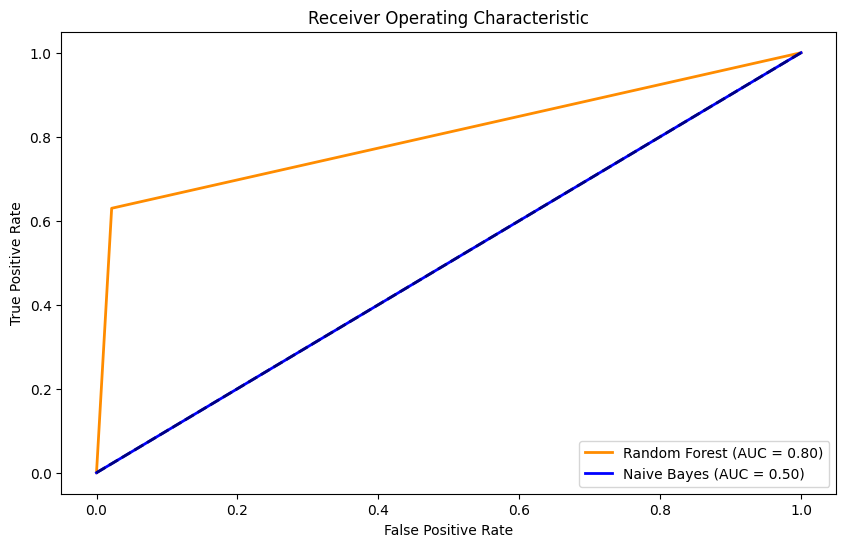

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Defining a function to calculate and printing performance metrics
def print_metrics(label, cm):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
    print(f"{label} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:")
    print(cm)

# Confusion matrices
rf_cm = confusion_matrix(y_test, y_pred_rf)
nb_cm = confusion_matrix(y_test, y_pred)

# Printing metrics
print_metrics("Random Forest", rf_cm)
print_metrics("Naive Bayes", nb_cm)

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_probs)

# Calculating AUC
rf_auc = auc(rf_fpr, rf_tpr)
nb_auc = auc(nb_fpr, nb_tpr)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
